# Estudo de Viabilidade de Visualizações

In [1]:
import numpy as np
import pandas as pd
from math import nan
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 500

# columns list
cols = ['CO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_PROVA_CH',
 'CO_PROVA_CN',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_UF_ESC',
 'CO_UF_PROVA',
 'NO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_PROVA',
 'NU_ANO',
 'NU_INSCRICAO',
 'NU_NOTA_CH',
 'NU_NOTA_CN',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025',
 'SG_UF_ESC',
 'SG_UF_PROVA',
 'TP_COR_RACA',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_ENSINO',
 'TP_ESCOLA',
 'TP_ESTADO_CIVIL',
 'TP_FAIXA_ETARIA',
 'TP_LINGUA',
 'TP_LOCALIZACAO_ESC',
 'TP_NACIONALIDADE',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'TP_SEXO',
 'TP_SIT_FUNC_ESC',
 'TP_STATUS_REDACAO',
 'TP_ST_CONCLUSAO',
 'TX_GABARITO_CH',
 'TX_GABARITO_CN',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT']

In [2]:
enem18 = pd.read_csv("../../dados_enem/microdados_enem_2018/DADOS/MICRODADOS_ENEM_2018.csv", sep=';', encoding = "ISO-8859-1")[cols]
print(enem18.shape)
enem18.head()

(5513733, 74)


,CO_MUNICIPIO_ESC,CO_MUNICIPIO_PROVA,CO_PROVA_CH,CO_PROVA_CN,CO_PROVA_LC,CO_PROVA_MT,CO_UF_ESC,CO_UF_PROVA,NO_MUNICIPIO_ESC,NO_MUNICIPIO_PROVA,...,TP_STATUS_REDACAO,TP_ST_CONCLUSAO,TX_GABARITO_CH,TX_GABARITO_CN,TX_GABARITO_LC,TX_GABARITO_MT,TX_RESPOSTAS_CH,TX_RESPOSTAS_CN,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT
0,1500800.0,1500800,454.0,449.0,457.0,462.0,15.0,15,Ananindeua,Ananindeua,...,1.0,2,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,CBAEACBBADABADEDDCDABBEAEEBBDDCECBECDABADDEEA,BABDABEECDBDCBCAAAEDCEDDEADADEACABEEBABCABADC,99999BDAECEBACECBBBBEBBDABDAAAADECCCDADBCCBBAA...,CCDAECBEBDAACDACABADECBDAADACBEDDAACBEABABDCD
1,NaN,1503200,454.0,447.0,457.0,459.0,NaN,15,NaN,Igarapé-Açu,...,1.0,1,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,BEDBBDBCCABDADABAEDDBAABCDACBECCEACABAEAAAEAB,BADEBBDBDECBADCCDCEDAEDBBEDCABEAECABCAEEAEACE,CDEBB99999ABADBBBEBDEBBADCDBCBDDCECDDAECAACDAA...,AEECACDEECDBBEEEABBEADDAADCEAEAEDCEBCDABDADEA
2,3155603.0,3155603,453.0,449.0,458.0,462.0,31.0,31,Rio Pardo de Minas,Rio Pardo de Minas,...,1.0,2,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,ECBDABEADCECAEAEECBCBDEABCDEADCBBCDAECDDBDABC,CEEEEDBDACBBDADABCCCBDBBEBCEDEAACBACEEEBEBBEE,ECBDB99999CBDDCEABEABDBDEEECCCDDCCCDBDBBAAECBC...,BCAAACEBDCDBACADEABACCBDADADBDBCDCDABBDCBCDCB
3,1500800.0,1500800,452.0,450.0,456.0,461.0,15.0,15,Ananindeua,Ananindeua,...,1.0,2,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,ACADBCEBDAACCDAEBEEDBDDDBEECDACAABDAABABEBECC,AAEBECBAEAECEBAABADCDBDCDBAEDACBCDCDDCDEEBBEC,99999CBBEBDBCEDDCAAEDAEAEABEDCABBBCCDCDDDDCACE...,DABDACDCD*ACCDDBBDADEABBEEADAECABADBDDA*CDAEA
4,NaN,2610905,452.0,448.0,456.0,460.0,NaN,26,NaN,Pesqueira,...,1.0,1,AEECDECBEBDCACDEDEEDBDDEBCECDECAABEDBEBBEBECC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,BBEDCCBBDBBBEADECACEDBEADABEDBABAECCBEABDDBACD...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,AACCCEEADEEACEBBBEECCCBEBCECDDDAEAEDEEABEDECB,ADEEEEEBDCBBBBCAACCCEEEDDACCCDBDAACCACBACECDC,99999CDEDDDDBADDCBEBBBBBBDCDCBBDEEDADEDBDDDEBC...,ACCABCCBBDAEDDCBEEEEEDECECABBDCECCECDDABEADDA


In [3]:
enem18.dtypes!='object'

CO_MUNICIPIO_ESC           True
CO_MUNICIPIO_PROVA         True
CO_PROVA_CH                True
CO_PROVA_CN                True
CO_PROVA_LC                True
CO_PROVA_MT                True
CO_UF_ESC                  True
CO_UF_PROVA                True
NO_MUNICIPIO_ESC          False
NO_MUNICIPIO_PROVA        False
NU_ANO                     True
NU_INSCRICAO               True
NU_NOTA_CH                 True
NU_NOTA_CN                 True
NU_NOTA_COMP1              True
NU_NOTA_COMP2              True
NU_NOTA_COMP3              True
NU_NOTA_COMP4              True
NU_NOTA_COMP5              True
NU_NOTA_LC                 True
NU_NOTA_MT                 True
NU_NOTA_REDACAO            True
Q001                      False
Q002                      False
Q003                      False
Q004                      False
Q005                       True
Q006                      False
Q007                      False
Q008                      False
Q009                      False
Q010    

In [4]:
percent_missing = enem18.isnull().sum() * 100 / len(enem18)
percent_missing.sort_values(ascending=False)

CO_MUNICIPIO_ESC          73.723501
TP_SIT_FUNC_ESC           73.723501
CO_UF_ESC                 73.723501
TP_LOCALIZACAO_ESC        73.723501
NO_MUNICIPIO_ESC          73.723501
TP_DEPENDENCIA_ADM_ESC    73.723501
SG_UF_ESC                 73.723501
TP_ENSINO                 36.829096
NU_NOTA_CN                29.175297
TX_RESPOSTAS_CN           29.175297
TX_GABARITO_MT            29.175297
TX_GABARITO_CN            29.175297
NU_NOTA_MT                29.175297
TX_RESPOSTAS_MT           29.175297
CO_PROVA_MT               29.175297
CO_PROVA_CN               29.175297
NU_NOTA_COMP1             24.765127
CO_PROVA_CH               24.765127
NU_NOTA_COMP2             24.765127
TX_GABARITO_CH            24.765127
CO_PROVA_LC               24.765127
TX_GABARITO_LC            24.765127
TX_RESPOSTAS_CH           24.765127
TP_STATUS_REDACAO         24.765127
TX_RESPOSTAS_LC           24.765127
NU_NOTA_CH                24.765127
NU_NOTA_LC                24.765127
NU_NOTA_COMP5             24

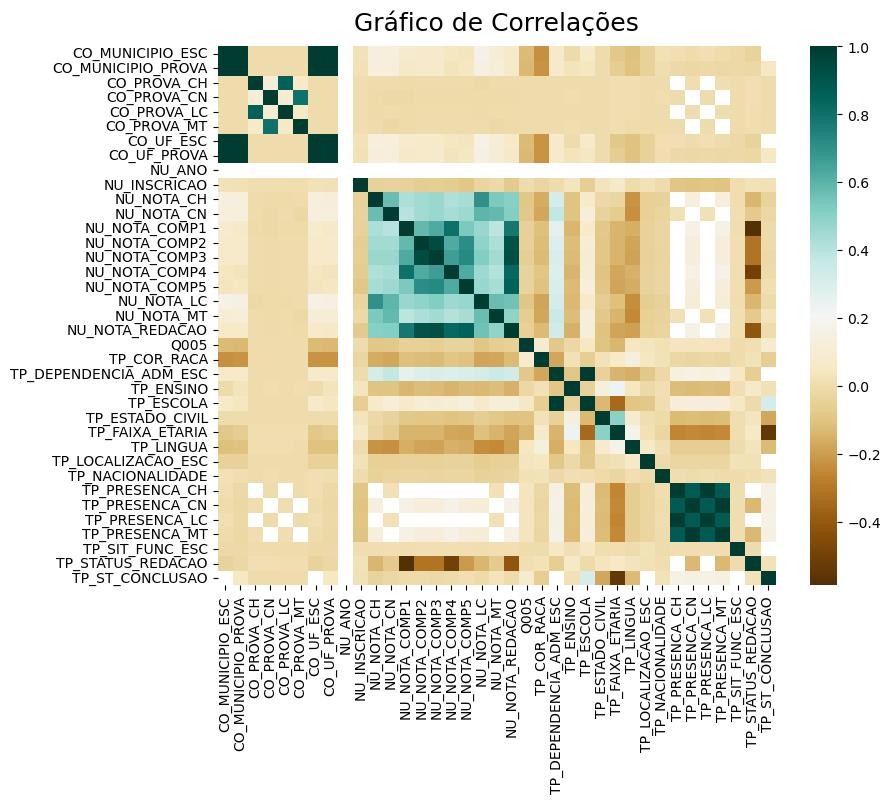

In [5]:
plt.figure(figsize=(9, 7))
heatmap = sns.heatmap(enem18.corr(numeric_only=True), cmap="BrBG", annot=False)
heatmap.set_title('Gráfico de Correlações', fontdict={'fontsize':18}, pad=12)
plt.show()

### Análise Viabilidade  - Visualização Geográfica

In [68]:
cities = enem18['NO_MUNICIPIO_PROVA'].value_counts().index.tolist()
occurs = enem18['NO_MUNICIPIO_PROVA'].value_counts().values

loc = pd.DataFrame({'Ano':2018, 'Cidade':cities, 'Numero Candidatos':occurs})
loc

,Ano,Cidade,Numero Candidatos
0,2018,São Paulo,247581
1,2018,Rio de Janeiro,150866
2,2018,Fortaleza,111056
3,2018,Brasília,106304
4,2018,Belo Horizonte,98780
...,...,...,...
1685,2018,Japurá,84
1686,2018,Bonfim,77
1687,2018,Jordão,65
1688,2018,Santa Rosa do Purus,54


In [57]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='luizhemelo')

In [58]:
location = geolocator.geocode('São Paulo, Brazil')
print(location.raw)

{'place_id': 297905772, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 298285, 'boundingbox': ['-24.0079003', '-23.3577551', '-46.8262692', '-46.3650898'], 'lat': '-23.5506507', 'lon': '-46.6333824', 'display_name': 'São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Geográfica Intermediária de São Paulo, São Paulo, Região Sudeste, Brasil', 'class': 'boundary', 'type': 'administrative', 'importance': 0.8861749119420277, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}


In [59]:
location = geolocator.geocode('Rio de Janeiro, Brazil')
print(location.raw)

{'place_id': 298323323, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 2697338, 'boundingbox': ['-23.0827051', '-22.7460878', '-43.796252', '-43.0990811'], 'lat': '-22.9110137', 'lon': '-43.2093727', 'display_name': 'Rio de Janeiro, Região Geográfica Imediata do Rio de Janeiro, Região Metropolitana do Rio de Janeiro, Região Geográfica Intermediária do Rio de Janeiro, Rio de Janeiro, Região Sudeste, Brasil', 'class': 'boundary', 'type': 'administrative', 'importance': 1.015262735848676, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_boundary_administrative.p.20.png'}


In [60]:
location = geolocator.geocode('Belo Horizonte, Brazil')
print(location.raw)

{'place_id': 365029176, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 246671856, 'boundingbox': ['-20.0827318', '-19.7627318', '-44.1050948', '-43.7850948'], 'lat': '-19.9227318', 'lon': '-43.9450948', 'display_name': 'Belo Horizonte, Região Geográfica Imediata de Belo Horizonte, Região Metropolitana de Belo Horizonte, Região Geográfica Intermediária de Belo Horizonte, Minas Gerais, Região Sudeste, 30180-107, Brasil', 'class': 'place', 'type': 'city', 'importance': 0.8253345524770843, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png'}


In [61]:
lat = [-23.5506507, -22.9110137, -19.9227318]
lng = [-46.6333824, -43.2093727, -43.9450948]
mean_lat = float("{:.5f}".format(np.mean(lat)))
mean_lng = float("{:.5f}".format(np.mean(lng)))